In [1]:
############################################################
## Title  : 'Comparison of multiple distributions'        ##
## Author : 'Sathish Kabatkar Ravindranth'                ##
## Date   : '09th December, 2021'                         ##
## Output : pdf document                                  ##
## Group  : 8                                             ##
############################################################

In [2]:
library(ggplot2)
library(ggpubr)
library(dplyr)

Warning message:
“Paket ‘ggplot2’ wurde unter R Version 4.1.1 erstellt”

Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
#Loading the Input data
input_data <- read.csv('ImmoDataRuhr.csv')

In [4]:
#View the input data
head(input_data)

,ID,sqmPrice,regio2
,<int>,<dbl>,<chr>
1,169,9.451613,Dortmund
2,232,7.084590,Bochum
3,427,11.403509,Dortmund
4,545,6.888889,Duisburg
5,620,10.039474,Duisburg
6,637,11.411357,Essen


In [5]:
#Changing the column names for better readability
colnames(input_data) <- c('ID','sqmPrice','Cities')

In [6]:
#Viewing the number of cities given in data
unique(input_data$Cities)

[1] "Dortmund" "Bochum"   "Duisburg" "Essen"

In [7]:
#Ordering the data based on the cities
input_data = input_data[order(input_data$Cities),]

In [8]:
#Mean value for rental price per square meter in overall
round(mean(input_data$sqmPrice),3)

[1] 9.149

In [9]:
#Variance of rental price per square meter in overall
round(var(input_data$sqmPrice),3)

[1] 1.664

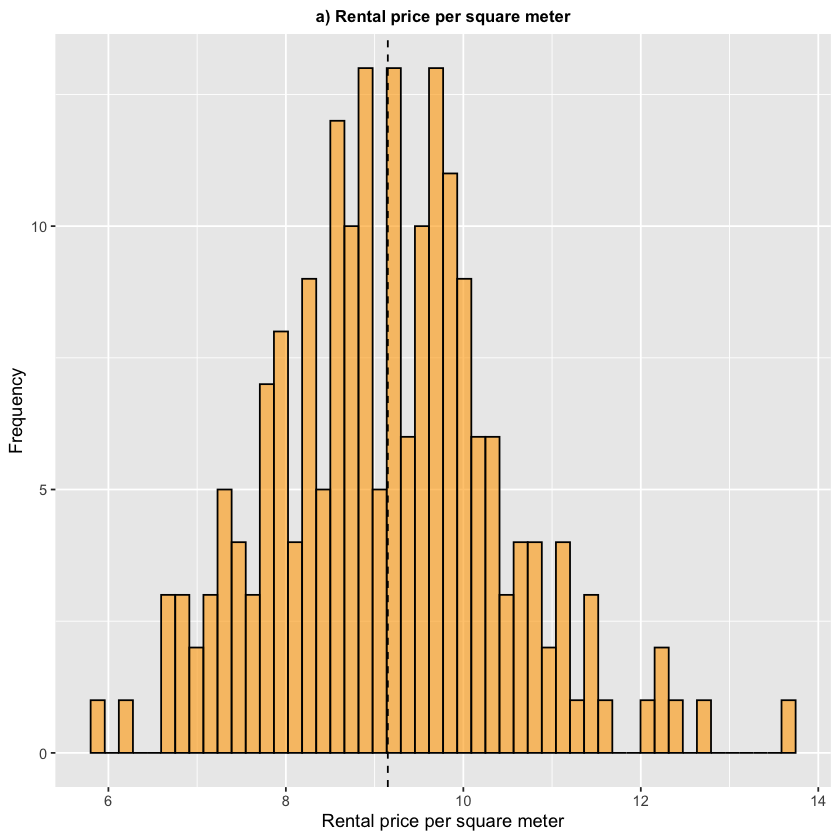

In [10]:
#Histogram to see the frequency distribution of the variable sqmPrice 
ggplot(input_data, aes(x=sqmPrice))+ 
  geom_histogram(color="black", fill="#ffa600",bins=50, alpha = 0.6)+
  xlab("Rental price per square meter") + ylab("Frequency") + ggtitle('a) Rental price per square meter') +
  theme(plot.title = element_text(face = "bold",hjust = 0.5, size = 10))



In [11]:
#Table that lists the various statistical measures calculated on the variable sqmPrice
Analysistable <- group_by(input_data, Cities) %>%
                            summarise(median = sprintf("%0.3f", median(sqmPrice, na.rm = TRUE)),
                                    mean = sprintf("%0.3f", mean(sqmPrice, na.rm = TRUE)),
                                    sd = sd(sqmPrice, na.rm = TRUE),
                                    variance = var(sqmPrice, na.rm = TRUE),
                                    minimum = min(sqmPrice, na.rm = TRUE),
                                    maximum = max(sqmPrice, na.rm = TRUE),
                                    IQR = quantile(sqmPrice, 3/4) - quantile(sqmPrice, 1/4))

In [12]:
Analysistable

Cities,median,mean,sd,variance,minimum,maximum,IQR
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Bochum,9.180,9.150,1.325280,1.756367,5.842550,12.71429,1.381138
Dortmund,9.552,9.526,1.355733,1.838011,6.662371,13.62857,1.916166
Duisburg,8.663,8.621,1.141194,1.302325,6.666667,11.10284,1.696234
Essen,9.278,9.299,1.187856,1.411001,6.250000,12.28261,1.654103


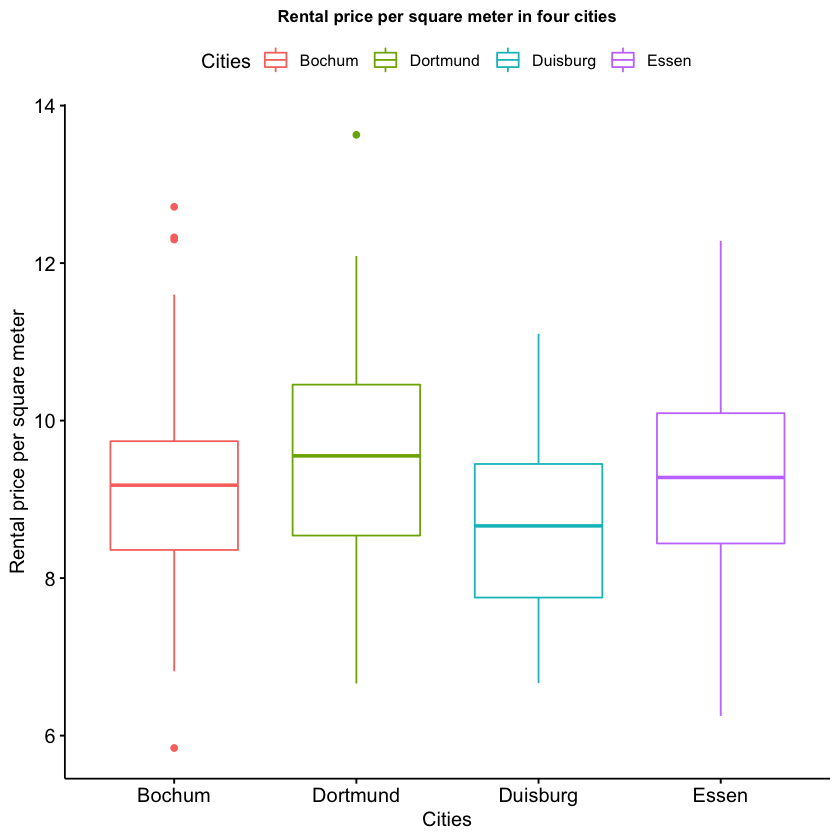

In [13]:
#Box plot to compare the sqmPrice in the different cities to find the homogeneity in variance
ggboxplot(input_data, x = "Cities", y = "sqmPrice", color = "Cities",
            ylab = "Rental price per square meter", xlab = "Cities") + ggtitle('Rental price per square meter in four cities') +
  theme(plot.title = element_text(face = "bold",hjust = 0.5, size = 10))

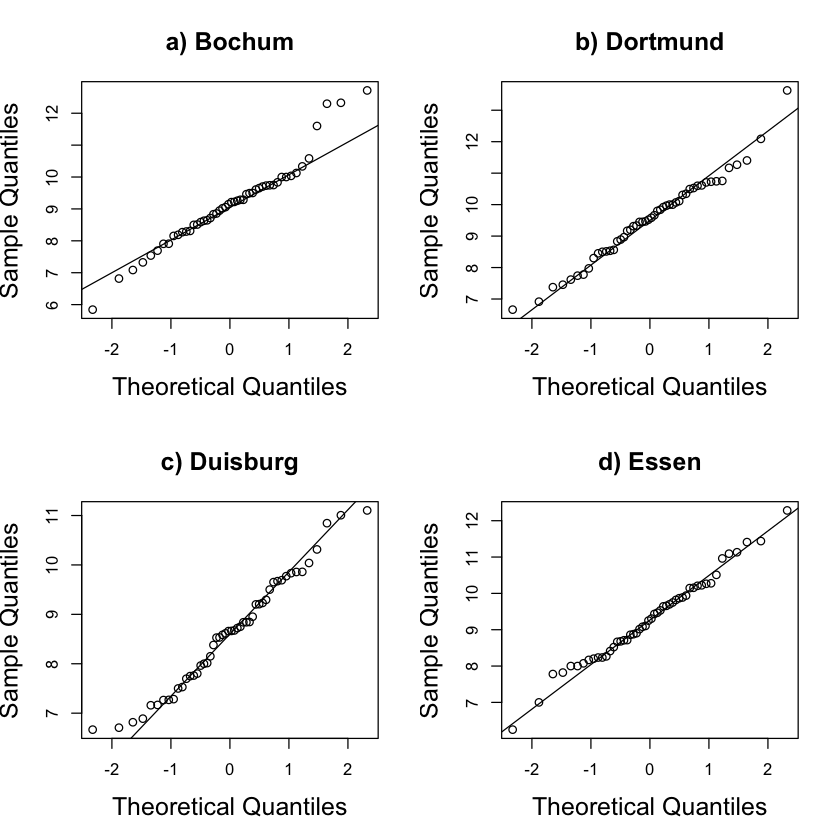

In [14]:
#QQ Plot to check the normality for each city's sqmPrice
par(mfrow=c(2,2))
p1 <- qqnorm(input_data$sqmPrice[input_data$Cities == "Bochum"], cex.lab=1.5, main="a) Bochum", cex.main=1.5)
qqline(input_data$sqmPrice[input_data$Cities == "Bochum"])
p2 <- qqnorm(input_data$sqmPrice[input_data$Cities == "Dortmund"], cex.lab=1.5, main="b) Dortmund", cex.main=1.5)
qqline(input_data$sqmPrice[input_data$Cities == "Dortmund"])
p3 <- qqnorm(input_data$sqmPrice[input_data$Cities == "Duisburg"], cex.lab=1.5, main="c) Duisburg", cex.main=1.5)
qqline(input_data$sqmPrice[input_data$Cities == "Duisburg"])
p4 <- qqnorm(input_data$sqmPrice[input_data$Cities == "Essen"], cex.lab=1.5, main="d) Essen", cex.main=1.5)
qqline(input_data$sqmPrice[input_data$Cities == "Essen"])

In [15]:
# One-way ANOVA test to check whether the mean sqmPrice is equal in all the cities
one_way_anova <- aov(sqmPrice ~ Cities, data = input_data)
summary(one_way_anova)

             Df Sum Sq Mean Sq F value  Pr(>F)   
Cities        3  22.15   7.382   4.681 0.00351 **
Residuals   196 309.08   1.577                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [16]:
#List of pair of cities to compare and use it in a table
pairs <- c('Dortmund_Bochum','Dortmund_Duisburg','Dortmund_Essen','Bochum_Duisburg','Bochum_Essen','Duisburg_Essen')

In [17]:
#Pairwise T-test between Dortmund and other cities
Dortmund_Bochum=rbind(subset(input_data,input_data$Cities==('Dortmund')), subset(input_data,input_data$Cities==('Bochum')))
Dortmund_Duisburg=rbind(subset(input_data,input_data$Cities==('Dortmund')), subset(input_data,input_data$Cities==('Duisburg')))
Dortmund_Essen=rbind(subset(input_data,input_data$Cities==('Dortmund')), subset(input_data,input_data$Cities==('Essen')))
#performing t tests
res1 <- t.test(sqmPrice ~ Cities, data = Dortmund_Bochum, var.equal = T)
res2 <- t.test(sqmPrice ~ Cities, data = Dortmund_Duisburg, var.equal = T)
res3 <- t.test(sqmPrice ~ Cities, data = Dortmund_Essen, var.equal = T) 

In [1]:
#Pairwise T-test between Bochum and other cities
Bochum_Duisburg=rbind(subset(input_data,input_data$Cities==('Bochum')), subset(input_data,input_data$Cities==('Duisburg')))
Bochum_Essen=rbind(subset(input_data,input_data$Cities==('Bochum')), subset(input_data,input_data$Cities==('Essen')))
#performing t tests
res4 <- t.test(sqmPrice ~ Cities, data = Bochum_Duisburg, var.equal = T)
res5 <- t.test(sqmPrice ~ Cities, data = Bochum_Essen, var.equal = T)

ERROR: Error in subset(input_data, input_data$Cities == ("Bochum")): Objekt 'input_data' nicht gefunden


In [19]:
#Pairwise T-test between Duisburg and other cities
Duisburg_Essen=rbind(subset(input_data,input_data$Cities==('Duisburg')), subset(input_data,input_data$Cities==('Essen')))
res6 <- t.test(sqmPrice ~ Cities, data = Duisburg_Essen, var.equal = T)

In [20]:
#Taking the p-values of all the t-tests
col1 <- round(c(res1$p.value,res2$p.value,res3$p.value,res4$p.value,res5$p.value,res6$p.value),4)

In [21]:
#Adjusting the p-value of all the t-tests using bonferroni method
cor1 <- round(p.adjust(col1, "bonferroni"),4)

In [22]:
#Tabulating the P-value before and after bonferroni adjust method
df <- data.frame(data.frame(pairs),data.frame(col1), data.frame(cor1))
names(df)[1] <- "Cities Pair"
names(df)[2] <- "Before Correction"
names(df)[3] <- "After Correction"
df["Reject Yes/No Before"] <- with(df, ifelse(df$`Before Correction` < 0.05, "Yes", "No"))
df["Reject Yes/No After"] <- with(df, ifelse(df$`After Correction` < 0.05, "Yes", "No"))

df<-df[, c("Cities Pair","Before Correction","Reject Yes/No Before","After Correction", "Reject Yes/No After")]
df


Cities Pair,Before Correction,Reject Yes/No Before,After Correction,Reject Yes/No After
<chr>,<dbl>,<chr>,<dbl>,<chr>
Dortmund_Bochum,0.1647,No,0.9882,No
Dortmund_Duisburg,0.0005,Yes,0.0030,Yes
Dortmund_Essen,0.3751,No,1.0000,No
Bochum_Duisburg,0.0349,Yes,0.2094,No
Bochum_Essen,0.5573,No,1.0000,No
Duisburg_Essen,0.0045,Yes,0.0270,Yes
